In [45]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [4]:
# Reflect Database into ORM classes
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurements', 'stations']

In [5]:
# Map measurments class
Measurements = Base.classes.measurements

In [6]:
# Map stations class
Stations = Base.classes.stations

In [7]:
# create a session
session = Session(engine)

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [9]:

# Get a list of column names and types: measurments table
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date INTEGER
prcp INTEGER
tobs INTEGER


In [10]:
# Get a list of column names and types:stations table
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude INTEGER
longitude INTEGER
elevation INTEGER


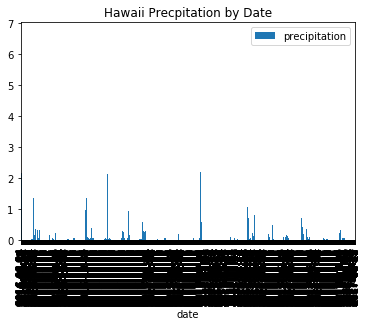

In [37]:
#Design a query to retrieve the last 12 months of precipitation data.
#Select only the date and prcp values.
date_prcp=session.query(Measurements.date,Measurements.prcp).\
    filter(Measurements.date > '2016-08-23').\
    order_by(Measurements.date).all()
    
len(date_prcp)

# Load the results into a pandas dataframe. Set the index to  date column
### BEGIN SOLUTION
date_prcp_df = pd.DataFrame(date_prcp[:6045], columns=['date', 'precipitation'])
date_prcp_df.set_index('date', inplace=True, )


date_prcp_df.head()

#date_prcp_df.iloc[::-1].plot.bar(title="Hawaii Precpitation by Date")
#plt.tight_layout()
#, figsize=(20,3)
date_prcp_df.plot(kind="bar")

# Set a title for the chart
plt.title("Hawaii Precpitation by Date")
plt.show()

In [33]:
date_prcp_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22
2016-08-24,2.15


In [ ]:
# Unpack the `date` and `prcp` from results and save into separate lists
dates =[]
prcps = []

for row in date_prcp:
    date = row[0]
    #print(date)
    dates.append(date)
    
    prcp = row[1]
    #print(prcp)
    prcps.append(prcp)

#print(dates)
#print(prcps)

In [61]:
#Station Analysis

#Design a query to calculate the total number of stations.
num_stations = session.query(Stations.station).count()
num_stations
#There are 9 stations



#Design a query to find the most active stations.
active_stations=session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(Measurements.station.desc()).all() 

#List the stations and observation counts in descending order
active_stations

#Which station has the highest number of observations?
#station USC00519281 has the highest number of observations

#Design a query to retrieve the last 12 months of temperature observation data (tobs)
#Filter by the station with the highest number of observations.
temp_obs=session.query(Measurements.date,Measurements.tobs).\
    filter(Measurements.date > '2016-08-23').\
    filter(Measurements.station == "USC00519281").\
    order_by(Measurements.date).all()
    
# Unpack the `date` and `temp` from results and save into separate lists
dates =[]
temps = []

for row in date_prcp:
    date = row[0]
    #print(date)
    dates.append(date)
    
    temp = row[1]
    #print(prcp)
    temps.append(temp)
    
temp_obs_df = pd.DataFrame(temp_obs[:6045], columns=['date', 'temperature'])
   

#joinging stations and measurments data
stations_join = session.query(Measurements.station, Measurements.date).filter(Measurements.station == Stations.station).all()

stations_join


temp_obs_df


,date,temperature
0,2016-08-24,77
1,2016-08-24,77
2,2016-08-24,77
3,2016-08-25,80
4,2016-08-25,80
5,2016-08-25,80
6,2016-08-26,80
7,2016-08-26,80
8,2016-08-26,80
9,2016-08-27,75


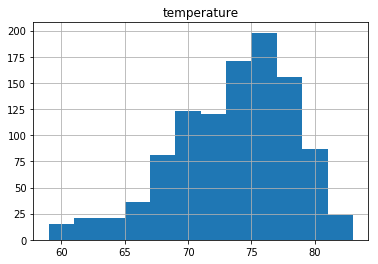

In [62]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
#Plot the results as a histogram with bins=12.
temp_obs_df.hist(column='temperature', bins=12)
plt.show()

In [65]:
#Temperature Analysis
def calc_temps (start_date, end_date):
     
    return session.query(func.min(Measurements.tobs), func.avg(Measurements.tobs), func.max(Measurements.tobs)).\
        filter(Measurements.date >= start_date).filter(Measurements.date <= end_date).all()
    

In [68]:
calc_temps('2016-02-28', '2016-03-05')

[(62, 69.975, 80)]

In [70]:
temperatures = (calc_temps('2016-02-28', '2016-03-05'))
labels = ['MIN', 'AVG', 'MAX']
vaccation_temps_df = pd.DataFrame.from_records(temperatures, columns=labels)
vaccation_temps_df

,MIN,AVG,MAX
0,62,69.975,80


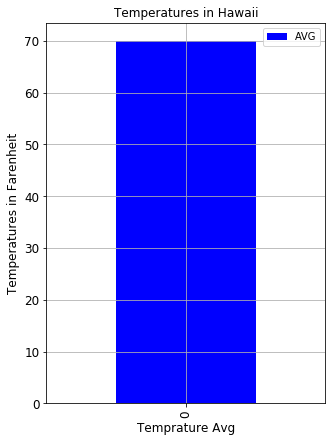

In [72]:
temp_chart = vaccation_temps_df[['AVG']].plot(kind='bar', title ="Temperatures in Hawaii", figsize=(5, 7), legend=True, fontsize=12, grid=True, color='blue')
temp_chart.set_xlabel("Temprature Avg", fontsize=12)
temp_chart.set_ylabel("Temperatures in Farenheit", fontsize=12)
plt.show()